# Example plot for node thresholding function

Presentation slide 7, inpsired by Drupsteens [2] first plot to show the functioning of nodes

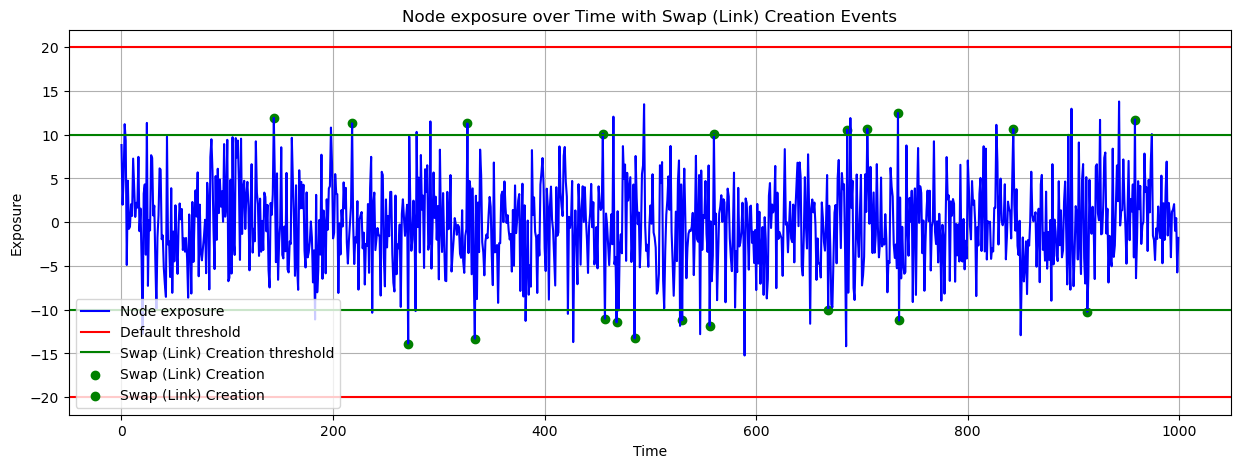

In [8]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0) 
time = np.arange(0, 1000)
balance = np.random.normal(loc=0.0, scale=5.0, size=time.shape)

# Thresholds for default and IRS creation
default_threshold = -20
irs_creation_threshold = 10

# IRS creation events occur at random when the internal balance exceeds the IRS creation threshold
irs_creation_events = np.random.choice(time[balance > irs_creation_threshold], size=15, replace=False)
irs_creation_balances = balance[irs_creation_events]

# To include the default for both high and low balances, we define the default for high balance
high_default_threshold = 20

# IRS creation events are now defined for both high and low balance extremes
irs_creation_events_high = np.random.choice(time[balance > irs_creation_threshold], size=10, replace=False)
irs_creation_balances_high = balance[irs_creation_events_high]

irs_creation_events_low = np.random.choice(time[balance < -irs_creation_threshold], size=10, replace=False)
irs_creation_balances_low = balance[irs_creation_events_low]

# Plotting with the updated conditions
plt.figure(figsize=(15, 5))
plt.plot(time, balance, label='Node exposure', color='blue')
plt.axhline(y=default_threshold, color='red', linestyle='-', label='Default threshold')
plt.axhline(y=high_default_threshold, color='red', linestyle='-')  # No label to avoid duplicate legend entries
plt.axhline(y=irs_creation_threshold, color='green', linestyle='-', label='Swap (Link) Creation threshold')
plt.axhline(y=-irs_creation_threshold, color='green', linestyle='-')  # No label to avoid duplicate legend entries
plt.scatter(irs_creation_events_high, irs_creation_balances_high, color='green', label='Swap (Link) Creation')
plt.scatter(irs_creation_events_low, irs_creation_balances_low, color='green', label='Swap (Link) Creation') 
plt.xlabel('Time')
plt.ylabel('Exposure')
plt.title('Node exposure over Time with Swap (Link) Creation Events')
plt.legend()
plt.grid(True)
plt.show()